# Recommendation System Collaborative Filtering

Disini kita akan mencoba menggunakan model rscf berdasarkan user based yg akan berisi nilai similarity antara pengguna-pengguna yg dihitung menggunakan Cosine Similarity.

contoh penerapan model rekomendasi ini spt kesamaan preferensi pengguna. misalnya, jika pengguna A memiliki preferensi yg mirip dengan pengguna B, maka item yg disukai oleh pengguna B ttp blm dilihat oleh pengguna A maka akan dapat direkomendasikan kpd pengguna A dan sbgnya.

Referensi

- ChatGPT

- https://medium.com/grabngoinfo/recommendation-system-user-based-collaborative-filtering-a2e76e3e15c4#:~:text=User%2Dbased%20collaborative%20filtering%20algorithm,average%20score%20for%20each%20item

- https://www.youtube.com/watch?v=72LEvUk6MSg

In [ ]:
!pip install faker
!pip install surprise 
!pip install pandas scikit-surprise matplotlib faker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import keras
import pandas as pd
import numpy as np
import tensorflow as tf
from faker import Faker
from faker.providers import address

In [ ]:
data = pd.read_csv('smsa_train.tsv', sep='\t')
df = pd.DataFrame(data)
df.iloc[0] = ['text', 'value'] 
df.columns = df.iloc[0]
df = df[1:]
df.head(10)

,text,value
1,lokasi strategis di jalan sumatera bandung . t...,positive
2,betapa bahagia nya diri ini saat unboxing pake...,positive
3,duh . jadi mahasiswa jangan sombong dong . kas...,negative
4,"makanan beragam , harga makanan di food stall ...",positive
5,pakai kartu kredit bca tidak untung malah rugi...,negative
6,"tempat unik , bagus buat foto , makanan enak ,...",positive
7,saya bersama keluarga baru saja menikmati peng...,positive
8,bersyukur,positive
9,simcard indosat inaktiv gara-gara lupa isi pul...,negative
10,sifat iri sering muncul pada orang orang yang ...,negative


In [ ]:
df.groupby('value').nunique()

,text
value,
negative,3412
neutral,1137
positive,6382


In [ ]:
df["text"].isnull().sum()

0

In [ ]:
df.head()

,text,value
1,lokasi strategis di jalan sumatera bandung . t...,positive
2,betapa bahagia nya diri ini saat unboxing pake...,positive
3,duh . jadi mahasiswa jangan sombong dong . kas...,negative
4,"makanan beragam , harga makanan di food stall ...",positive
5,pakai kartu kredit bca tidak untung malah rugi...,negative


In [ ]:
# adding new columns
fake = Faker()

df['User ID'] = [fake.uuid4() for _ in range(len(df))] 
df['Tasker ID'] = [fake.uuid4() for _ in range(len(df))]
df['Rating'] = [fake.random_int(min=1, max=5) for _ in range(len(df))]
df['Timestamp'] = pd.to_datetime('now')
df['Jenis Jasa'] = [fake.word() for _ in range(len(df))]
df['Deskripsi Jasa'] = [fake.text() for _ in range(len(df))]

daftar_kota = ['Jakarta', 'Bandung', 'Bogor', 'Depok', 'Tangerang', 'Surabaya', 'Yogyakarta', 'Semarang']
df['Lokasi'] = [fake.random_element(elements=daftar_kota) for _ in range(len(df))]
df['Harga'] = [fake.random_int(min=100000, max=1000000) for _ in range(len(df))]

df.to_csv('new_smsa_train_.csv', index=False)

<ipython-input-22-5b1ad6897537>:7: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['Timestamp'] = pd.to_datetime('now')


Sebenarnya column yg berguna rating user id, tasker id, jenis jasa, dan rating sih. barangkali kalian ada ide kan makanya aku buat banyak columns hahah

In [ ]:
df.tail()

,text,value,User ID,Tasker ID,Rating,Timestamp,Jenis Jasa,Deskripsi Jasa,Lokasi,Harga
10994,tidak kecewa,positive,a2fb48b5-d364-49a6-a56d-0091ac9b0eb0,a6c2ef28-ddc3-4f33-b163-d7342832e13c,5,2023-05-25 00:30:22.626193,out,Significant physical authority protect level b...,Jakarta,568210
10995,enak rasa masakan nya apalagi kepiting yang me...,positive,830f4380-82a1-43a4-aecb-d7edd1483d04,564fee53-c005-43c5-80ab-b99d0c7432bb,5,2023-05-25 00:30:22.626193,easy,Drop price bag give short. Ground treatment ow...,Tangerang,631629
10996,hormati partai-partai yang telah berkoalisi,neutral,57e8665e-4bcb-486e-ab7e-430749fa6280,25bb4ff3-8daa-441c-b375-99153f5272af,5,2023-05-25 00:30:22.626193,chair,Should free accept push security physical. Sea...,Bandung,311227
10997,"pagi pagi di tol pasteur sudah macet parah , b...",negative,afa4a79b-2f2b-43d7-81fd-b72e08d68701,3aeff422-5d59-41ae-973a-0075f3afe233,3,2023-05-25 00:30:22.626193,try,Television raise white necessary car turn.\nPo...,Semarang,478238
10998,meskipun sering belanja ke yogya di riau junct...,positive,ee5e4207-392b-4e8e-ab86-f22299856a22,39954952-2ca4-429b-9274-388d0ef5bcd4,5,2023-05-25 00:30:22.626193,win,Heavy tree down my represent and itself.\nElse...,Semarang,868490


In [ ]:
# making matrix ratings from users and taskers
users = df['User ID'].unique()  
taskers = df['Tasker ID'].unique() 

num_users = len(users)
num_taskers = len(taskers)

rating_matrix = np.zeros((num_users, num_taskers))  # intialization matrix from 0

In [ ]:
# mengisi nilai rating matrix yg sesuai
for index, row in df.iterrows():
    user_id = row['User ID']
    tasker_id = row['Tasker ID']
    rating = row['Rating']
    
    user_index = np.where(users == user_id)[0][0]  # get index user
    tasker_index = np.where(taskers == tasker_id)[0][0]  # get index tasker
    
    rating_matrix[user_index, tasker_index] = rating
print(rating_matrix)

[[4. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 4. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 5. 0. 0.]
 [0. 0. 0. ... 0. 3. 0.]
 [0. 0. 0. ... 0. 0. 5.]]


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# menghitung similarity matrixnya
user_similarity_matrix = cosine_similarity(rating_matrix)
print(user_similarity_matrix)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
# menentukan target pengguna
target_user_index = 0  # misalnya, pengguna dengan indeks 0
target_user_similarity = user_similarity_matrix[target_user_index] # got similarity

# menghitung rata-rata rating users
target_user_ratings = rating_matrix[target_user_index]
target_user_mean_rating = np.mean(target_user_ratings)

In [ ]:
# menghitung pengguna yang memiliki similarity target
similar_users_indices = np.argsort(target_user_similarity)[::-1]  
similar_users_indices = similar_users_indices[1:]  

In [ ]:
# menghitung prediksi rating untuk setiap tasker yang belum dinilai oleh pengguna target
recommendations = []
for tasker_index in range(num_taskers):
    if rating_matrix[target_user_index, tasker_index] == 0:  # tasker yg blm menilai
        numerator = 0
        denominator = 0
        for user_index in similar_users_indices:
            if rating_matrix[user_index, tasker_index] != 0:  # tasker yg sudah menilai
                similarity = target_user_similarity[user_index]
                user_rating = rating_matrix[user_index, tasker_index]
                user_mean_rating = np.mean(rating_matrix[user_index])
                numerator += similarity * (user_rating - user_mean_rating)
                denominator += np.abs(similarity)
        if denominator != 0:
            predicted_rating = target_user_mean_rating + (numerator / denominator)
            recommendations.append((tasker_index, predicted_rating))

In [ ]:
# showing prediksi rating
recommendations.sort(key=lambda x: x[1], reverse=True)  
for tasker_index, predicted_rating in recommendations:
    tasker_id = taskers[tasker_index]
    print(f"Rekomendasi Tasker: {tasker_id}, Prediksi Rating: {predicted_rating}")

## Evaluasi dan validasi model


In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import cross_validate

reader = Reader(rating_scale=(1, 5))
train_dataset = Dataset.load_from_df(train_data[['User ID', 'Tasker ID', 'Rating']], reader)

In [ ]:
# latih mengunakan knn
model = KNNBasic()
model.fit(train_dataset.build_full_trainset())

Computing the msd similarity matrix...
Done computing similarity matrix.


In [ ]:
# prediksi untuk test dataset
test_dataset = Dataset.load_from_df(test_data[['User ID', 'Tasker ID', 'Rating']], reader)
testset = test_dataset.build_full_trainset().build_testset()
predictions = model.test(testset)

In [ ]:
from surprise import accuracy

# Evaluasi model dengan MAE
mae = accuracy.mae(predictions)

# Evaluasi model dengan RMSE
rmse = accuracy.rmse(predictions)

MAE:  1.1960
RMSE: 1.4018


In [ ]:
# Contoh: Mengubah parameter k pada algoritma KNN
model = KNNBasic(k=40)
model.fit(train_dataset.build_full_trainset())

Computing the msd similarity matrix...
Done computing similarity matrix.


In [ ]:
predictions = model.test(testset)

mae = accuracy.mae(predictions)
rmse = accuracy.rmse(predictions)

MAE:  1.1960
RMSE: 1.4018


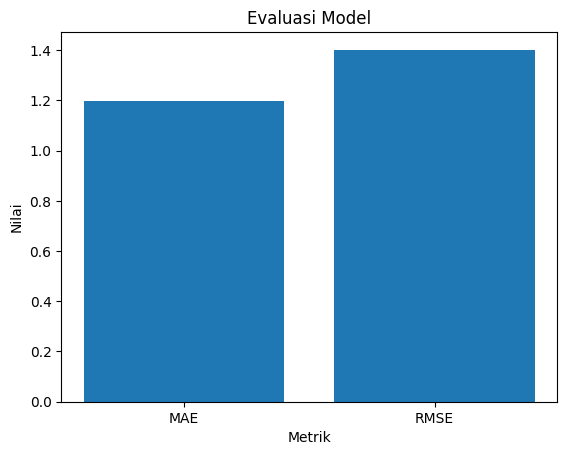

In [ ]:
import matplotlib.pyplot as plt

# Plot MAE dan RMSE
metrics = ['MAE', 'RMSE']
values = [mae, rmse]

plt.bar(metrics, values)
plt.xlabel('Metrik')
plt.ylabel('Nilai')
plt.title('Evaluasi Model')
plt.show()